In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LSTM을 활용한 흡연 탐지 모델링

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np
import pandas as pd
import io
import os
import matplotlib.image as img
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
import json
import itertools
import keras

# Train, Valid, Test Set 만들기

In [6]:
train_x_data_DF = genfromtxt('/content/drive/MyDrive/6조/train_x_train_t/train_x.csv', delimiter=',')
train_t_mod_DF = pd.read_csv('/content/drive/MyDrive/6조/train_x_train_t/train_t.csv', sep=',')

valid_x_data_DF = genfromtxt('/content/drive/MyDrive/6조/train_x_train_t/valid_x.csv', delimiter=',')
valid_t_mod_DF = pd.read_csv('/content/drive/MyDrive/6조/train_x_train_t/valid_t.csv', sep=',')

test_x_data_DF = genfromtxt('/content/drive/MyDrive/6조/train_x_train_t/test_x.csv', delimiter=',')
test_t_mod_DF = pd.read_csv('/content/drive/MyDrive/6조/train_x_train_t/test_t.csv', sep=',')

train_x_data = train_x_data_DF
train_t_mod = train_t_mod_DF

valid_x_data = valid_x_data_DF
valid_t_mod = valid_t_mod_DF

test_x_data = test_x_data_DF
test_t_mod = test_t_mod_DF

# easydict를 이용한 args 생성

In [ ]:
import easydict
 
args = easydict.EasyDict({
        "batchsize": 1,
        "epoch": 1,
        "out": "result",
        "resume": False,
        "validationsplit": 0.2,
        "optimizer": "rmsprop",
        "frame": 8,
})

# 데이터셋 shape 맞추기

In [ ]:
# [ -1, (한번에 들어갈 입력값 수), (좌표개수) ]
# 13개의 x,y 좌표이므로 26개
train_x = tf.reshape(train_x_data,[-1, args.frame, 26])
train_t = tf.reshape(train_t_mod,[-1,1])

In [ ]:
val_x = tf.reshape(valid_x_data,[-1, args.frame, 26])
val_t = tf.reshape(valid_t_mod,[-1,1])

In [ ]:
test_x = tf.reshape(new_test5,[-1, args.frame, 26])
# test_t = tf.reshape(test_t_mod,[-1,1])

#모델링 및 저장

In [ ]:
def generate_model():
    ip = Input(shape=(args.frame,26))

    x = Masking()(ip)
    x = LSTM(units = 50, return_sequences = True)(x)
    x = LSTM(units=50)(x)
    x = Dropout(0.3)(x)

  
    y = Reshape((208, 1))(ip)
    y = Conv1D (kernel_size=3, filters=128, strides=3, padding='valid',kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    
    y = Conv1D (kernel_size=3, filters=128, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = MaxPooling1D(pool_size=3, strides=3)(y)

    y = Conv1D (kernel_size=3, filters=128, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = MaxPooling1D(pool_size=3, strides=3)(y)


    y = Conv1D (kernel_size=3, filters=256, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = MaxPooling1D(pool_size=3, strides=3)(y) 

  
    y = Conv1D (kernel_size=3, filters=256, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = MaxPooling1D(pool_size=2, strides=2)(y) 
     
   
    y = Dropout(0.5)(y)
    y = Flatten()(y)
    
    x = concatenate([x, y])

    out = Dense(1, activation='sigmoid')(x)
    

    model = Model(ip, out)
    return model
model = generate_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 26)]      0           []                               
                                                                                                  
 reshape (Reshape)              (None, 208, 1)       0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 69, 128)      512         ['reshape[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 69, 128)     512         ['conv1d[0][0]']                 
 alization)                                                                                   

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

early_stopping = EarlyStopping()

model = generate_model()
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
history = model.fit(train_x, train_t, epochs=15, batch_size=32,validation_data=(val_x, val_t))
                    # ,callbacks=[early_stopping])
# model.save('final_model.h5')

Epoch 1/15
383/383 [==============================] - 43s 87ms/step - loss: 0.4961 - accuracy: 0.7652 - val_loss: 0.4152 - val_accuracy: 0.8095
Epoch 2/15
383/383 [==============================] - 30s 79ms/step - loss: 0.3675 - accuracy: 0.8304 - val_loss: 0.2950 - val_accuracy: 0.8663
Epoch 3/15
383/383 [==============================] - 31s 80ms/step - loss: 0.3134 - accuracy: 0.8596 - val_loss: 0.3990 - val_accuracy: 0.8217
Epoch 4/15
383/383 [==============================] - 31s 80ms/step - loss: 0.2804 - accuracy: 0.8773 - val_loss: 0.3143 - val_accuracy: 0.8633
Epoch 5/15
383/383 [==============================] - 31s 80ms/step - loss: 0.2548 - accuracy: 0.8889 - val_loss: 0.2719 - val_accuracy: 0.8824
Epoch 6/15
383/383 [==============================] - 31s 81ms/step - loss: 0.2330 - accuracy: 0.8993 - val_loss: 0.2406 - val_accuracy: 0.9001
Epoch 7/15
383/383 [==============================] - 31s 81ms/step - loss: 0.2061 - accuracy: 0.9175 - val_loss: 0.1967 - val_accuracy:

#모델 불러오기

In [ ]:
import keras

new_model = tf.keras.models.load_model('/content/drive/MyDrive/6조/model.h5')

#모델 평가

In [ ]:
answer = model.predict(new_test6.reshape(-1, 8, 26))
print("Answer : {}".format(answer))

Answer : [[0.83073163]]


#matplotlib을 이용한 데이터 시각화

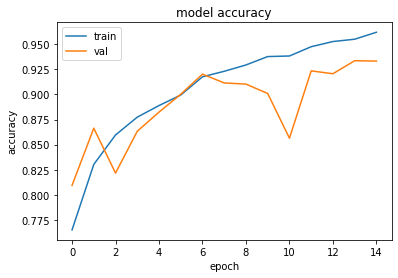

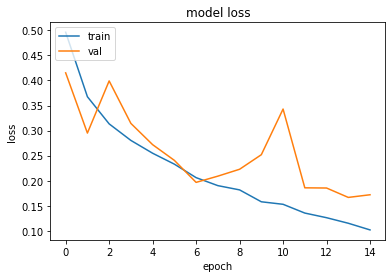

In [ ]:
import matplotlib

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()